# Final Project - Linkedin

## Introduction to Data Analytics 2021

### Presented by Racheli Hayat, Einav Diar, Adar Achwal and Sapir Hastar

### Group #3

#### Data source: https://www.kaggle.com/killbot/linkedin-profiles-and-jobs-data
#### Our GitHub: https://github.com/einavdiar/Linkedin

<img src="https://i.pinimg.com/originals/d3/3b/d9/d33bd9baa83a336184055c07dc8ccaa8.gif" width=700 height=700 align=left />

## We've chosen to analyze information about Linkedin, an online social network designed to create professional and business connections between its users.
## During the project, we analyzed the network data in order to find the factors that help users reach efficient use of the network.
## As students and future engineers, over the next few years we will be looking for a job, therefore, it's important for us to learn about the best way to utalize this platform.




<img src="https://admin.drushim.co.il/Content/Uploads/636670041546219798_84.1.jpg" width=700 height=700 align=center />

In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/einavdiar/Linkedin/main/Linkedin.csv')

# Wrangling data:


## 1. Handling missing values:

In [3]:
data=data.dropna(subset =['genderEstimate'])
data['hasPicture'].fillna('no picture', inplace = True)
data['companyHasLogo'].fillna('no logo', inplace = True)
data=data.dropna(subset = ['companyName'])

#### 1) We removed missing data rows from "companyName" and "genderEstimate". 
#### 2) From missing values under "hasPicture" and "companyHasLogo" we filled "no picture / logo".

In [4]:
missing=data[['genderEstimate','hasPicture','companyHasLogo','companyName']].isnull().sum()
pd.DataFrame(missing)

,0
genderEstimate,0
hasPicture,0
companyHasLogo,0
companyName,0


## 2. Fix columns:

In [5]:
data[['genderEstimate','hasPicture','companyHasLogo','companyName','followersCount','ageEstimate']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35565 entries, 0 to 39536
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   genderEstimate  35565 non-null  object
 1   hasPicture      35565 non-null  object
 2   companyHasLogo  35565 non-null  object
 3   companyName     35565 non-null  object
 4   followersCount  35565 non-null  int64 
 5   ageEstimate     35565 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### All our Dtypes were correct.
## 

# What do you think?
### Who is more likely to use linkedin?
### Male or Female?


<img src="https://askthescientists.com/wp-content/uploads/2018/04/AdobeStock_62125649.png" width=700 height=700 align=center />

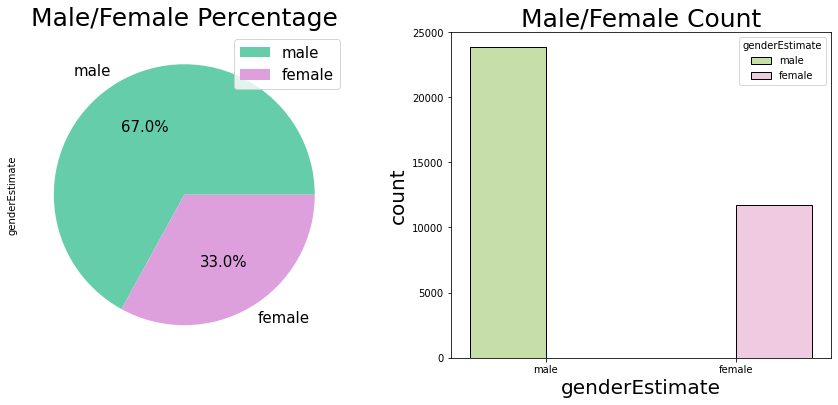

In [6]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.title("Male/Female Percentage",fontsize=25)
plotpie=data['genderEstimate'].value_counts().plot.pie(autopct='%1.1f%%',colors = ['mediumaquamarine', 'plum'],fontsize=15)
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.title("Male/Female Count",fontsize=25)
plt.xlabel("Gender Estimate",fontsize=20)
plt.ylabel("Count",fontsize=20)
sns.countplot( x="genderEstimate",data=data , edgecolor = 'black', palette = 'PiYG_r', hue='genderEstimate')
plt.show()

## On these charts we can see that there are more male users than females
## 

## We would like to examine if there's a connection between Gender and Followers Count

Text(-2.575000000000003, 0.5, 'Followers Count')

<Figure size 1440x432 with 0 Axes>

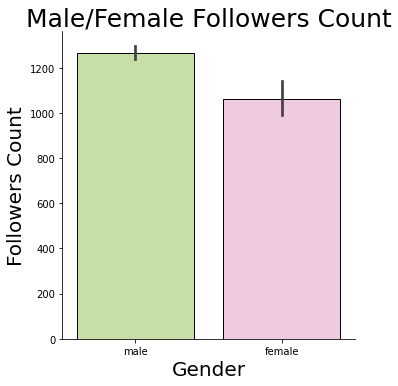

In [7]:
plt.figure(figsize=(20, 6))
type_df = data[["genderEstimate", "followersCount"]]
sns.catplot(data=type_df, kind="bar", x="genderEstimate", y = "followersCount",height=5,aspect=1,edgecolor = 'black',palette = 'PiYG_r')
plt.title("Male/Female Followers Count",fontsize=25)
plt.xlabel("Gender",fontsize=20)
plt.ylabel("Followers Count",fontsize=20)

## Although the number of females is significantly lower than the number of males,
## Their average followers are close to the average followers of males.
## Despite their low number, we can  see that they have a high exposure and number of followers (almost the same as males).
## Therefore, it can be assumed that the LinkedIn network is recommended for females.









# 

## We would like to examine the connection between Logo, Picture and Followers Count

<img src="https://digitalpedagogydotwordpressdotcom.files.wordpress.com/2020/02/linkedin-4763813_1920.png" width=600 height=600 align=center />

In [8]:
plt.figure(figsize=(10, 5))
data.loc[data['hasPicture'].str.contains('jpg'), 'hasPicture'] = 'has picture'
data.loc[data['hasPicture'].str.contains('A'), 'hasPicture'] = 'has picture'
data.loc[data['companyHasLogo'].str.contains('png'), 'companyHasLogo'] = 'has logo'
data.loc[data['companyHasLogo'].str.contains('jpg'), 'companyHasLogo'] = 'has logo'
data.loc[data['companyHasLogo'].str.contains('e'), 'companyHasLogo'] = 'has logo'
data.loc[data['companyHasLogo'].str.contains('A'), 'companyHasLogo'] = 'has logo'

<Figure size 720x360 with 0 Axes>

### To analyze the data, we replaced values under these columns 

Text(0, 0.5, 'Followers Count')

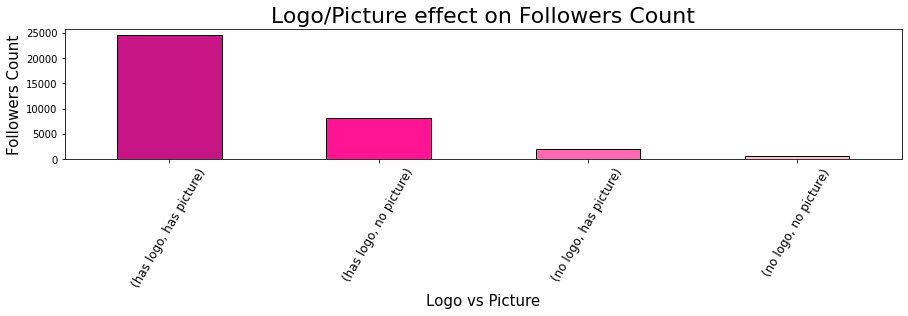

In [9]:
plt.figure(figsize=(15, 2.4))
data.groupby(['companyHasLogo','hasPicture'])['followersCount'].count().plot.bar(edgecolor = 'black',color=['mediumvioletred','deeppink', 'hotpink', 'pink'])
plt.xticks(rotation=60,fontsize=12)
plt.title("Logo/Picture effect on Followers Count",fontsize=22)
plt.xlabel("Logo vs Picture",fontsize=15)
plt.ylabel("Followers Count",fontsize=15)

## The graph clearly shows that users should upload both logo and image.
## A logo has a higher impact on the number of followers than an image, and it shows that an image without a logo is less effective.
## As you can see, users without logo and image have a significantly lower amount of followers.

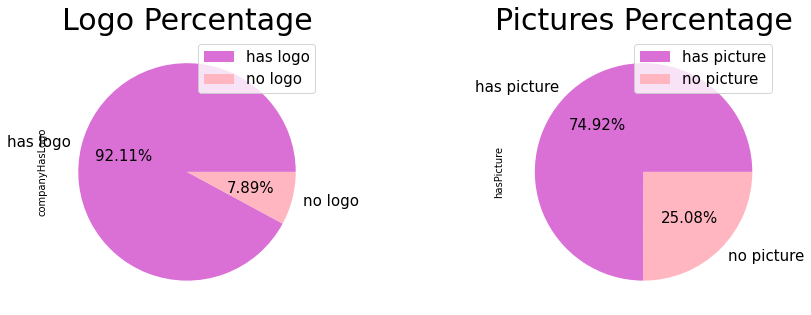

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title("Logo Percentage",fontsize=30)
plotpie=data['companyHasLogo'].value_counts().plot.pie(autopct='%1.2f%%',colors = ['orchid', 'lightpink'],fontsize=15)
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.title("Pictures Percentage",fontsize=30)
plotpie=data['hasPicture'].value_counts().plot.pie(autopct='%1.2f%%',colors = ['orchid', 'lightpink'],fontsize=15)
plt.legend(fontsize=15)
plt.show()

## As you can see, most of the LinkedIn users have logo and picture.
## 

## We would like to examine the connection between Age and Followers Count

<img src="https://thumbs.dreamstime.com/b/vector-growing-up-baby-becoming-adolescent-mature-man-elderly-disabled-guy-age-evolution-stages-different-162321909.jpg" width=900 height=900 align=left />

Text(0, 0.5, 'Followers Count')

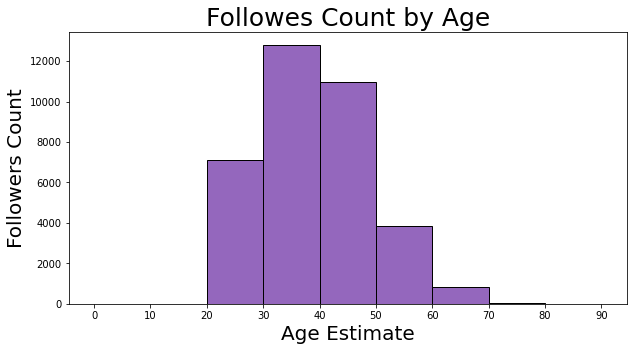

In [11]:
age = data['ageEstimate']
plt.figure(figsize=(10, 5))
plt.hist(age, bins = range(0, 100, 10) , edgecolor = 'black', color = "tab:purple")
plt.xticks(range(0, 100, 10))
plt.title("Followes Count by Age",fontsize=25)
plt.xlabel('Age Estimate',fontsize=20)
plt.ylabel('Followers Count',fontsize=20)

## Base on the above graph, users between the ages of 30 to 50 have the highest number of followers.
## We can assume that the high number of followers for this age group is attributed to their  experience and seniority.

In [12]:
maxage=data.groupby('followersCount')[['ageEstimate']].max()
maxage.tail()

,ageEstimate
followersCount,
27067,28
29883,53
30156,41
30242,52
161922,50


## As you can see, the LinkedIn users with the highest number of followers are in the 30-50 age group.

## 

## In conclusion, in our research we wanted to examine the dependency between the following variables : gender, logo & image, age and followers count.

## Our dependent variable is the followers count, and our independent variables are gender, logo & image and age.

<img src="https://allstarsdigital.in/wp-content/uploads/2020/09/linkedin_Ads.png" width=800 height=800 align=center />


## We found that the most useful ways to use LinkedIn is:
## 1. Although the number of females using the network is lower then the number of males, the  followers count percent was almost the same for both.
## 2. Using image is importand for user exposure. However, including a logo has a greater impact.
## 3. The users with the highest number of followers are in the age group of 30-50 .

In [13]:
maxage=data.groupby('followersCount')[['genderEstimate','hasPicture','companyHasLogo','ageEstimate']].max()
maxage.tail()

,genderEstimate,hasPicture,companyHasLogo,ageEstimate
followersCount,,,,
27067,male,no picture,has logo,28
29883,male,has picture,has logo,53
30156,female,has picture,no logo,41
30242,male,has picture,has logo,52
161922,female,has picture,no logo,50


## As you can see, the findings from the table suitable to our expectations.


<img src="https://www.edigitalagency.com.au/wp-content/uploads/linkedin-logo-gif-funny-man-suitcase.gif" width=600 height=600 align=center />